In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration

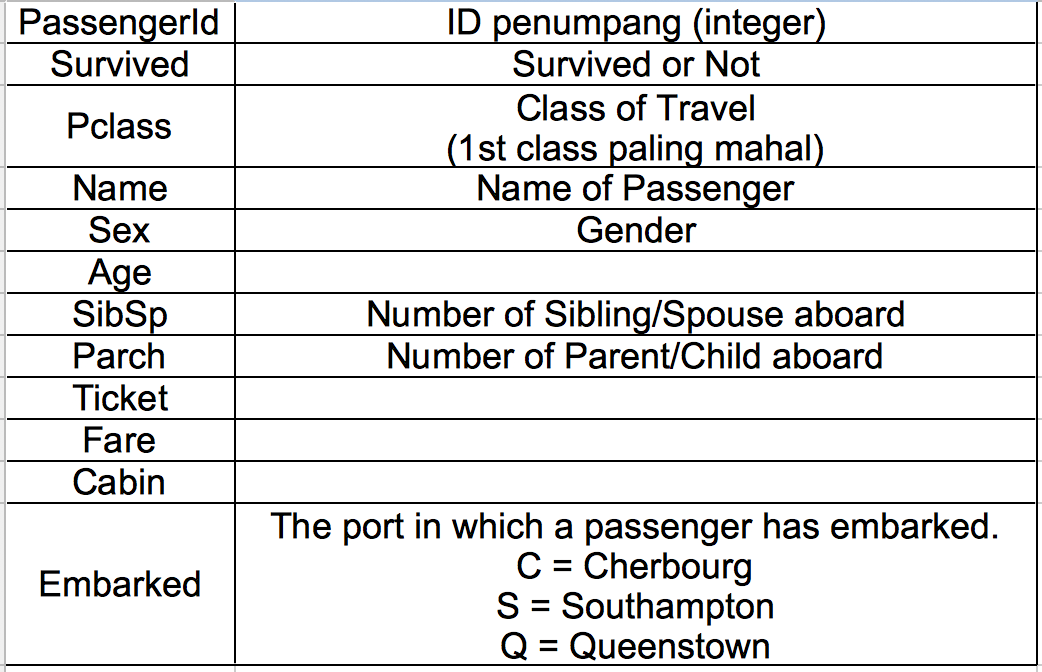

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv("./data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=["Name", "Ticket"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
100 / df.count().max() * df.isna().sum()

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df.fillna({"Embarked": "S"}, inplace=True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [16]:
df.nunique()

Survived      2
Pclass        3
Sex           2
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X = df.drop(columns=["Survived"])
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [20]:
model = KNeighborsClassifier(n_neighbors=1)

In [21]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [22]:
model.score(X, y)

0.8855218855218855

# Dataset Splitting

In [23]:
X = df.drop(columns=["Survived"])
y = df.Survived

X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9199438202247191, 0.6815642458100558)

# Concept 2: K-fold Cross Validation

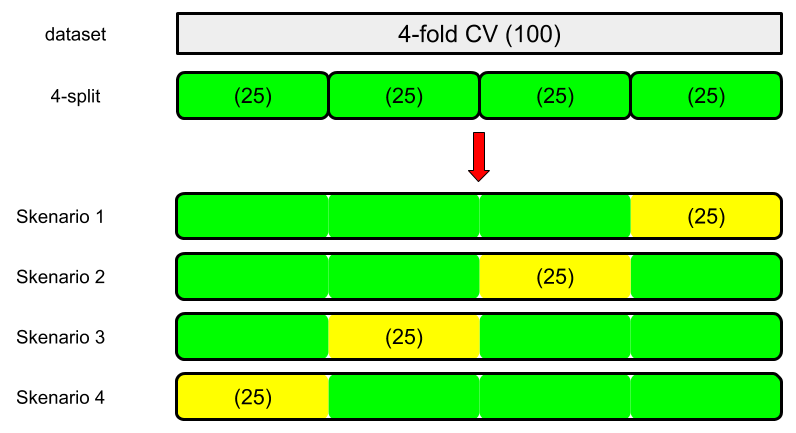

In [29]:
illustration.kfold_cv

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
model = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model, X, y, cv=5)

array([0.62569832, 0.67977528, 0.8258427 , 0.73033708, 0.79213483])

In [32]:
cross_val_score(model, X, y, cv=5).mean()

0.7307576423325592

# Improvement melalui data: Feature Scaling

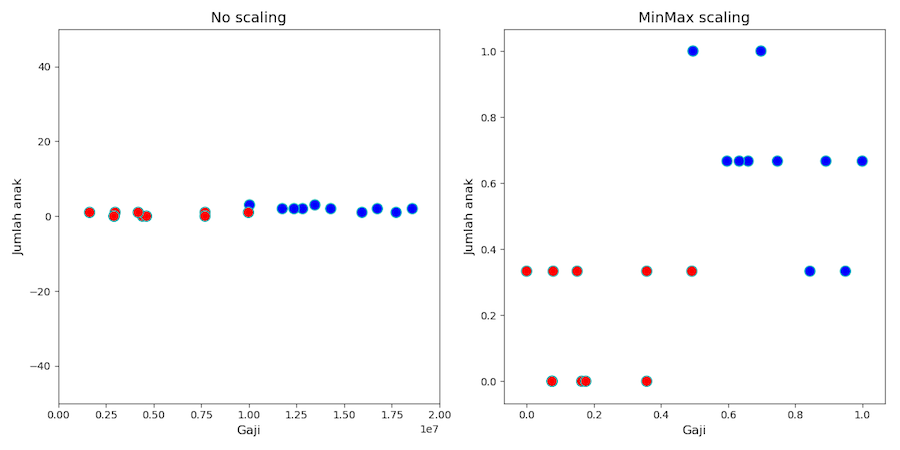

In [33]:
illustration.knn_scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled, y_train)

model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9185393258426966, 0.7430167597765364)

In [37]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model, X_train_scaled, y_train, cv=5).mean()

0.7107258938244854

# Improvement melalui model: Parameter Tuning

### Tuning n_neighbor tanpa scaling

Train score max: 0.9199438202247191
Train n: 1
Test score max: 0.7541899441340782
Test n: 3


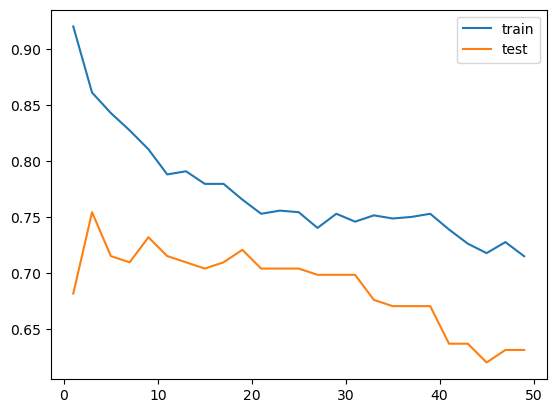

In [38]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

print(f"Train score max: {np.max(train_score)}")
print(f"Train n: {neighbor[np.argmax(train_score)]}")

print(f"Test score max: {np.max(test_score)}")
print(f"Test n: {neighbor[np.argmax(test_score)]}")

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

### Tuning n_neighbor dengan scaling

Train score max: 0.9185393258426966
Train n: 1
Test score max: 0.7988826815642458
Test n: 29


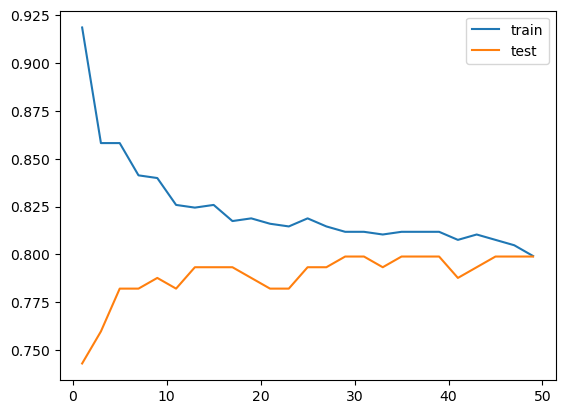

In [39]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_scaled, y_train)
    
    train_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))

print(f"Train score max: {np.max(train_score)}")
print(f"Train n: {neighbor[np.argmax(train_score)]}")

print(f"Test score max: {np.max(test_score)}")
print(f"Test n: {neighbor[np.argmax(test_score)]}")

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

### Tuning n_neighbor dengan weight by distance

Train score max: 0.9325842696629213
Train n: 9
Test score max: 0.7988826815642458
Test n: 49


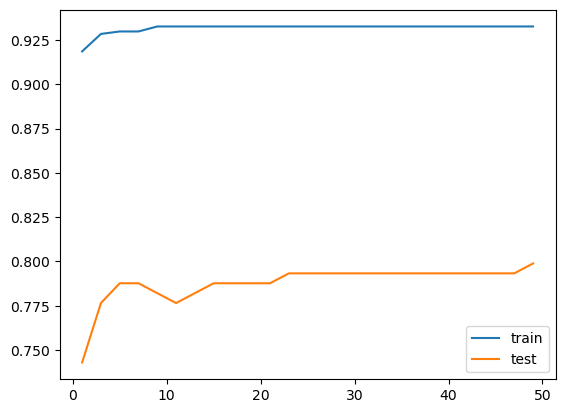

In [40]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n, weights="distance")
    model.fit(X_train_scaled, y_train)
    
    train_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))

print(f"Train score max: {np.max(train_score)}")
print(f"Train n: {neighbor[np.argmax(train_score)]}")

print(f"Test score max: {np.max(test_score)}")
print(f"Test n: {neighbor[np.argmax(test_score)]}")

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

### Pakai Manhattan Distance

Train score max: 0.9325842696629213
Train n: 9
Test score max: 0.7932960893854749
Test n: 5


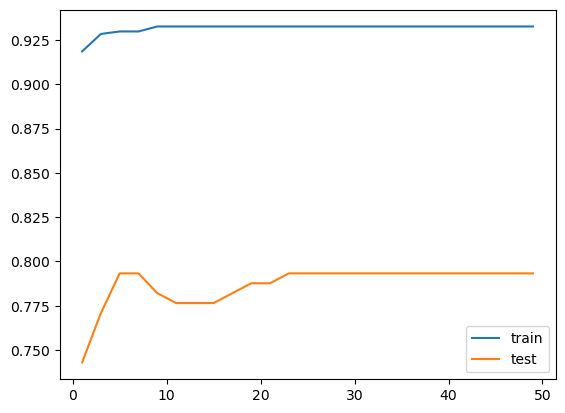

In [41]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n, weights="distance", p=1)
    model.fit(X_train_scaled, y_train)
    
    train_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))

print(f"Train score max: {np.max(train_score)}")
print(f"Train n: {neighbor[np.argmax(train_score)]}")

print(f"Test score max: {np.max(test_score)}")
print(f"Test n: {neighbor[np.argmax(test_score)]}")

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Train score max: 0.761025673215743
Train n: 9


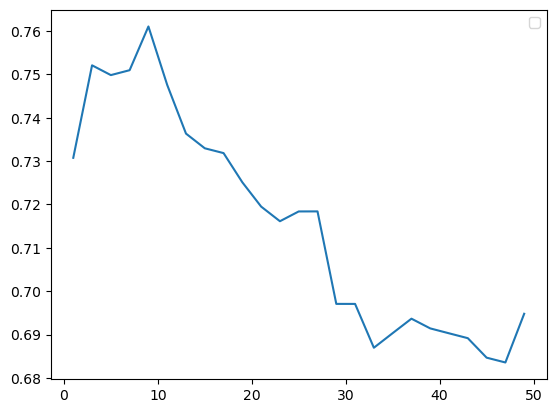

In [42]:
# Coba coba menggunakan k-folds
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

neighbor = range(1, 51, 2)
scores = []

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n)

    scores.append(cross_val_score(model, X, y, cv=5).mean())

print(f"Train score max: {np.max(scores)}")
print(f"Train n: {neighbor[np.argmax(scores)]}")


plt.plot(neighbor, scores)
plt.legend()

Train score max: 0.8058753373925052
Train n: 33


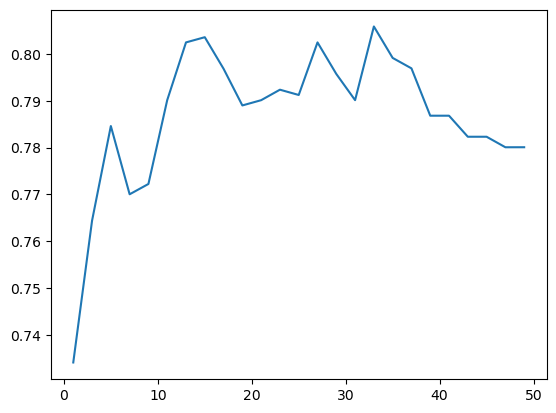

In [43]:
# Coba coba menggunakan k-folds
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

neighbor = range(1, 51, 2)
scores = []

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for n in neighbor:
    model = KNeighborsClassifier(n_neighbors=n)

    scores.append(cross_val_score(model, X_scaled, y, cv=5).mean())

print(f"Train score max: {np.max(scores)}")
print(f"Train n: {neighbor[np.argmax(scores)]}")


plt.plot(neighbor, scores)